# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Deden Muhamad Furqon
- **Email:** furqoncreative24@gmail.com
- **ID Dicoding:** furqoncreative

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang menghasilkan pendapatan tertinggi dan volume penjualan terbanyak?
- Bagaimana kinerja pendapatan dan volume penjualan berdasarkan lokasi (kota) geografis penjual?

## Import Semua Packages/Library yang Digunakan

In [96]:
from unicodedata import category

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [97]:
olist_product_df = pd.read_csv('data/olist_products_dataset.csv')
olist_product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [98]:
olist_order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
olist_order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [99]:
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [100]:
olist_seller_df = pd.read_csv('data/olist_sellers_dataset.csv')
olist_seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**Insight:**

Olist Product Dataset
- Dataset ini berisi data produk seperti ID, ukuran, kategori dan harga.
- Dataset ini dapat digunakan untuk menganalisis pertanyaan pertama dengan adanya data kategori dan harga di dalamnya.

Olist Order Item Dataset
- Dataset ini berisi data item penjualan seperti ID produk, ID penjualan, dan harga total transaksi
- Dataset ini dapat digunakan untuk menganalisis pertanyaan pertama dan kedua dengan adanya data asosiasi antara ID produk, ID penjual, dan total transaksinya.

Product Category Name Translation
- Dataset ini berisi data kategori dan terjemahannya dalam bahasa inggris.
- Dataset ini originalnya berasal dari Brazil dan menggunakan bahasa Portugis, Sehingga penting mengetahui transalisnya dalam bahasa inggris agar proses analisisnya lebih mudah.

Olist Seller Dataset
- Dataset ini berisi data penjual seperti ID, nama, alamat, dan telepon.
- Dataset ini dapat digunakan untuk menganalisis pertanyaan kedua dengan adanya data geografis penjual.

### Assessing Data

OLIST PRODUCT

In [101]:
olist_product_df.info()

olist_product_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [102]:
print("Jumlah data duplikat:")
olist_product_df.duplicated().sum()

Jumlah data duplikat:


np.int64(0)

OLIST ORDER ITEMS

In [103]:
olist_order_items_df.info()

olist_order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [104]:
print("Jumlah data duplikat:")
olist_order_items_df.duplicated().sum()

Jumlah data duplikat:


np.int64(0)

PRODUCT CATEGORY NAME

In [105]:
product_category_name_translation.info()

product_category_name_translation.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

In [106]:
print("Jumlah data duplikat:")
product_category_name_translation.duplicated().sum()

Jumlah data duplikat:


np.int64(0)

OLIST SELLER

In [107]:
olist_seller_df.info()

olist_seller_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [108]:
print("Jumlah data duplikat:")
olist_seller_df.duplicated().sum()

Jumlah data duplikat:


np.int64(0)

**Insight:**

Olist Product Dataset:
- Missing values ditemukan pada beberapa kolom: product_weight_g (2), product_length_cm (2), product_height_cm (2), product_width_cm (2), dan product_category_name (610)
- Dataset ini memiliki 32.951 baris dan 9 kolom
- Kolom penting untuk analisis: product_id, product_category_name, dimensi produk, dan berat produk
- Terdapat outlier pada kolom dimensi dan berat produk

Olist Order Items Dataset:
- Dataset bersih tanpa missing values
- Dataset ini memiliki 112.650 baris dan 7 kolom
- Kolom penting untuk analisis: order_id, seller_id, price, freight_value

Product Category Name Translation Dataset:
- Dataset bersih tanpa missing values
- Dataset ini memiliki 71 baris dan 2 kolom
- Kolom berisi kategori dalam bahasa portugis dan terjemahannya dalam bahasa inggris
- Dataset ini penting untuk translasi kategori produk

Olist Seller Dataset:
- Dataset bersih tanpa missing values
- Dataset ini memiliki 3.095 baris dan 4 kolom
- Kolom penting untuk analisis: seller_id, seller_city, seller_state
- Data lokasi penjual terdistribusi di berbagai kota dan negara bagian



### Cleaning Data

OLIST PRODUCT

In [109]:
olist_product_df.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_height_cm', 'product_width_cm', 'product_length_cm'], inplace=True)

In [110]:
olist_product_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [111]:
olist_product_df['product_category_name'] = olist_product_df['product_category_name'].fillna('uncategorized')

In [112]:
print("Missing values after cleaning:")
print(olist_product_df.isna().sum())


Missing values after cleaning:
product_id               0
product_category_name    0
dtype: int64


**Insight:**
- Dilakukan pembersihan data dengan menghapus kolom-kolom yang tidak diperlukan untuk analisis (product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_height_cm, product_width_cm product_length_cm)
- Tidak data kosong ataupun duplikat pada datasete lainnya, sehingga tidak ada yang perlu dibersihkan


## Exploratory Data Analysis (EDA)

### Explore Olist Products & Product Category Name

In [113]:
merged_olist_product = olist_product_df.merge(product_category_name_translation, on='product_category_name')
merged_olist_product.describe(include='all')

,product_id,product_category_name,product_category_name_english
count,32328,32328,32328
unique,32328,71,71
top,106392145fca363410d287a815be6de4,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


### Explore Olist Order Items & Olist Product

In [114]:
merged_olist_order_items = olist_order_items_df.merge(merged_olist_product, on='product_id')
merged_olist_order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
count,111023,111023.000000,111023,111023,111023,111023.000000,111023.000000,111023,111023
unique,97256,NaN,32328,3033,92053,NaN,NaN,71,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,cama_mesa_banho,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,11115,11115
mean,NaN,1.198229,NaN,NaN,NaN,120.755104,20.025548,NaN,NaN
std,NaN,0.706931,NaN,NaN,NaN,183.372746,15.841472,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.310000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,NaN,NaN


In [115]:
category_metrics = merged_olist_order_items.groupby('product_category_name_english').agg({
    'price': ['sum', 'count']
}).reset_index()

category_metrics.columns = ['category', 'revenue', 'sales_volume']

In [116]:
revenue_top = category_metrics.nlargest(10, 'revenue')
revenue_top.head()

,category,revenue,sales_volume
43,health_beauty,1258681.34,9670
70,watches_gifts,1205005.68,5991
7,bed_bath_table,1036988.68,11115
65,sports_leisure,988048.97,8641
15,computers_accessories,911954.32,7827


In [117]:
volume_top = category_metrics.nlargest(10, 'sales_volume')
volume_top.head()

,category,revenue,sales_volume
7,bed_bath_table,1036988.68,11115
43,health_beauty,1258681.34,9670
65,sports_leisure,988048.97,8641
39,furniture_decor,729762.49,8334
15,computers_accessories,911954.32,7827


### Explore Olist Seller

In [118]:
olist_seller_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [119]:
merged_olist_seller = olist_seller_df.merge(merged_olist_order_items, on='seller_id')
seller_city_metrics = merged_olist_seller.groupby('seller_city').agg({
    'price': ['sum', 'count']
}).reset_index()

seller_city_metrics.columns = ['city', 'revenue', 'sales_volume']

In [120]:
seller_city_revenue_top = seller_city_metrics.nlargest(10, 'revenue')
seller_city_revenue_top.head()

,city,revenue,sales_volume
511,sao paulo,2673549.42,27767
225,ibitinga,622324.13,7733
158,curitiba,460364.27,2983
444,rio de janeiro,345923.02,2374
219,guarulhos,279139.81,1975


In [121]:
seller_city_revenue_top = seller_city_metrics.nlargest(10, 'sales_volume')
seller_city_revenue_top.head()

,city,revenue,sales_volume
511,sao paulo,2673549.42,27767
225,ibitinga,622324.13,7733
158,curitiba,460364.27,2983
477,santo andre,228441.90,2961
501,sao jose do rio preto,194330.38,2573


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang menghasilkan pendapatan tertinggi dan volume penjualan terbanyak?

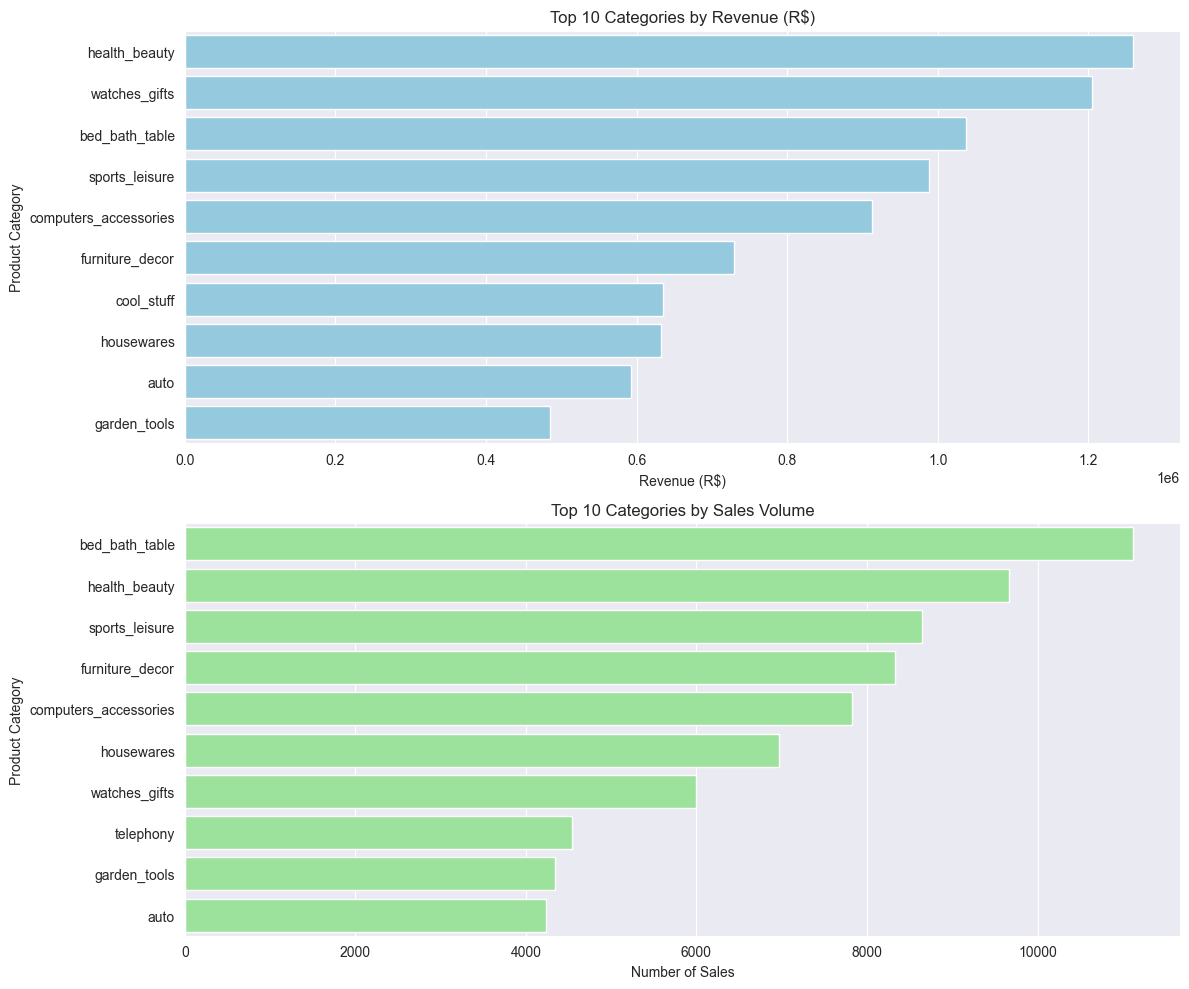

In [122]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

sns.barplot(data=revenue_top, x='revenue', y='category', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Categories by Revenue (R$)')
ax1.set_xlabel('Revenue (R$)')
ax1.set_ylabel('Product Category')

sns.barplot(data=volume_top, x='sales_volume', y='category', ax=ax2, color='lightgreen')
ax2.set_title('Top 10 Categories by Sales Volume')
ax2.set_xlabel('Number of Sales')
ax2.set_ylabel('Product Category')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana kinerja pendapatan dan volume penjualan berdasarkan lokasi (kota) geografis penjual?

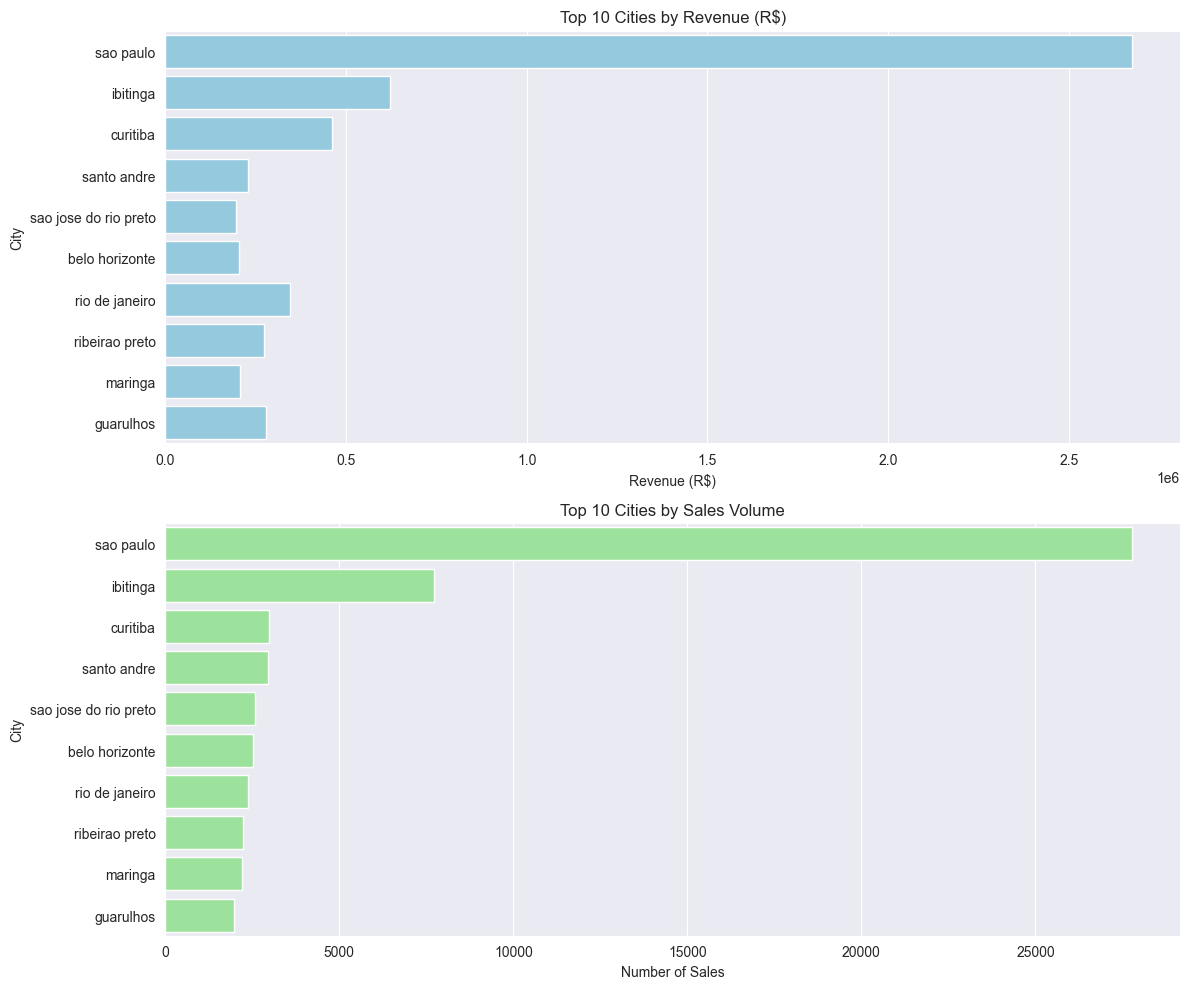

In [123]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

sns.barplot(data=seller_city_revenue_top.head(10), x='revenue', y='city', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Cities by Revenue (R$)')
ax1.set_xlabel('Revenue (R$)')
ax1.set_ylabel('City')

sns.barplot(data=seller_city_revenue_top.head(10), x='sales_volume', y='city', ax=ax2, color='lightgreen')
ax2.set_title('Top 10 Cities by Sales Volume')
ax2.set_xlabel('Number of Sales')
ax2.set_ylabel('City')

plt.tight_layout()
plt.show()


**Insight:**

1. Kategori produk yang menghasilkan pendapatan tertinggi dan volume penjualan terbanyak:
- Kategori Health & Beauty menghasilkan pendapatan tertinggi sekitar R\$ 1.25M, diikuti oleh Watches & Gifts (R\$ 1.20M) dan Bed Bath Table (R\$ 1.03M)
- Untuk volume penjualan, kategori Bed Bath Table memimpin dengan 11,115 penjualan, diikuti oleh Health & Beauty (9,670) dan Sports & Leisure (8,641)
- Hal ini menunjukkan bahwa meskipun Bed Bath Table memiliki volume penjualan tertinggi, harga per unitnya lebih rendah dibanding Health & Beauty

2. Kinerja pendapatan dan volume penjualan berdasarkan kota:
- São Paulo secara signifikan mendominasi baik dari sisi pendapatan (R\$ 2.67M) maupun volume penjualan (27,767)
- Ibitinga berada di posisi kedua dengan pendapatan R\$ 622K dan 7,733 penjualan
- Curitiba di posisi ketiga dengan pendapatan R\$ 460K dan 2,983 penjualan
- Terdapat kesenjangan yang besar antara kinerja São Paulo dengan kota-kota lainnya, menunjukkan konsentrasi aktivitas e-commerce yang tinggi di ibu kota


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

# Apendix

Export All Data to CSV (For Dasboard)

In [125]:
olist_orders_df = pd.read_csv('data/olist_orders_dataset.csv')

merged_cleaned_df = olist_order_items_df.merge(olist_product_df, on='product_id') \
    .merge(olist_orders_df, on='order_id') \
    .merge(product_category_name_translation, on='product_category_name') \
    .merge(olist_seller_df, on='seller_id')

merged_cleaned_df.to_csv('dashboard/all_data.csv', index=False)